# EDA and Feature Extraction

#### EE 242: Smart Grid Grid Sensors and Data-Driven Applications
##### Instructor: Dr. Mohsenian-Rad

##### By: Daniel O'Connor

#### Data Source: 

https://ieee-dataport.org/documents/synthetic-power-quality-disturbances-dataset-single-and-combined-disturbances-generated


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_df = pd.read_csv('Data/PQData.csv')
labels_df = pd.read_csv('Data/PQLabel.csv')
data_df.head()

,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779.19,-0.53583.19,-0.48175.19,-0.42578.19,-0.36812.19,-0.30902.19,-0.24869.19,-0.18738.19,-0.12533.19,-0.062791.19
0,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
1,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
2,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
3,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
4,0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,0.53583,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791


In [3]:
labels_df.head()

,1
0,1
1,1
2,1
3,1
4,1


In [4]:
# From datasource: "Each signal in the dataset is sampled at a frequency of 5 kHz"

sampling_frequency = 5000 #Hz
time_between_samples = 1/sampling_frequency
time_between_samples

0.0002

In [5]:
#There is an issue with no column names, the title of the column is the first signal. 
#Re-labeling the columns with times

#turn the dataframes into arrays for ease of use in feature extractions/re-formatting dataframes
data_array = data_df.to_numpy() 
label_array = labels_df.to_numpy()

#combine the data
label_and_data_array = np.concatenate((label_array, data_array), axis=1)

#Calculate the time between samples (1/sr) 
times = [round(i * time_between_samples,4) for i in range(data_array.shape[1])]

#put together dataframe
columns = ['label']+ times
df = pd.DataFrame(data=label_and_data_array, columns=columns)

In [6]:
df.head()

,label,0.0,0.0002,0.0004,0.0006,0.0008,0.001,0.0012,0.0014,0.0016,...,0.198,0.1982,0.1984,0.1986,0.1988,0.199,0.1992,0.1994,0.1996,0.1998
0,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
1,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
2,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
3,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791
4,1.0,0.0,0.062791,0.12533,0.18738,0.24869,0.30902,0.36812,0.42578,0.48175,...,-0.58779,-0.53583,-0.48175,-0.42578,-0.36812,-0.30902,-0.24869,-0.18738,-0.12533,-0.062791


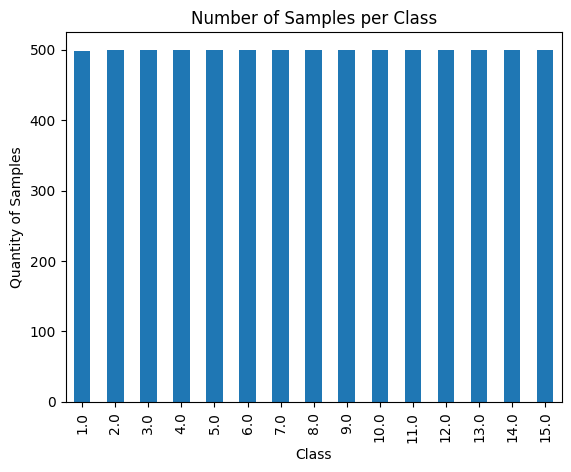

In [7]:
df['label'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.ylabel('Quantity of Samples')
plt.xlabel('Class')
plt.title('Number of Samples per Class')
plt.show()

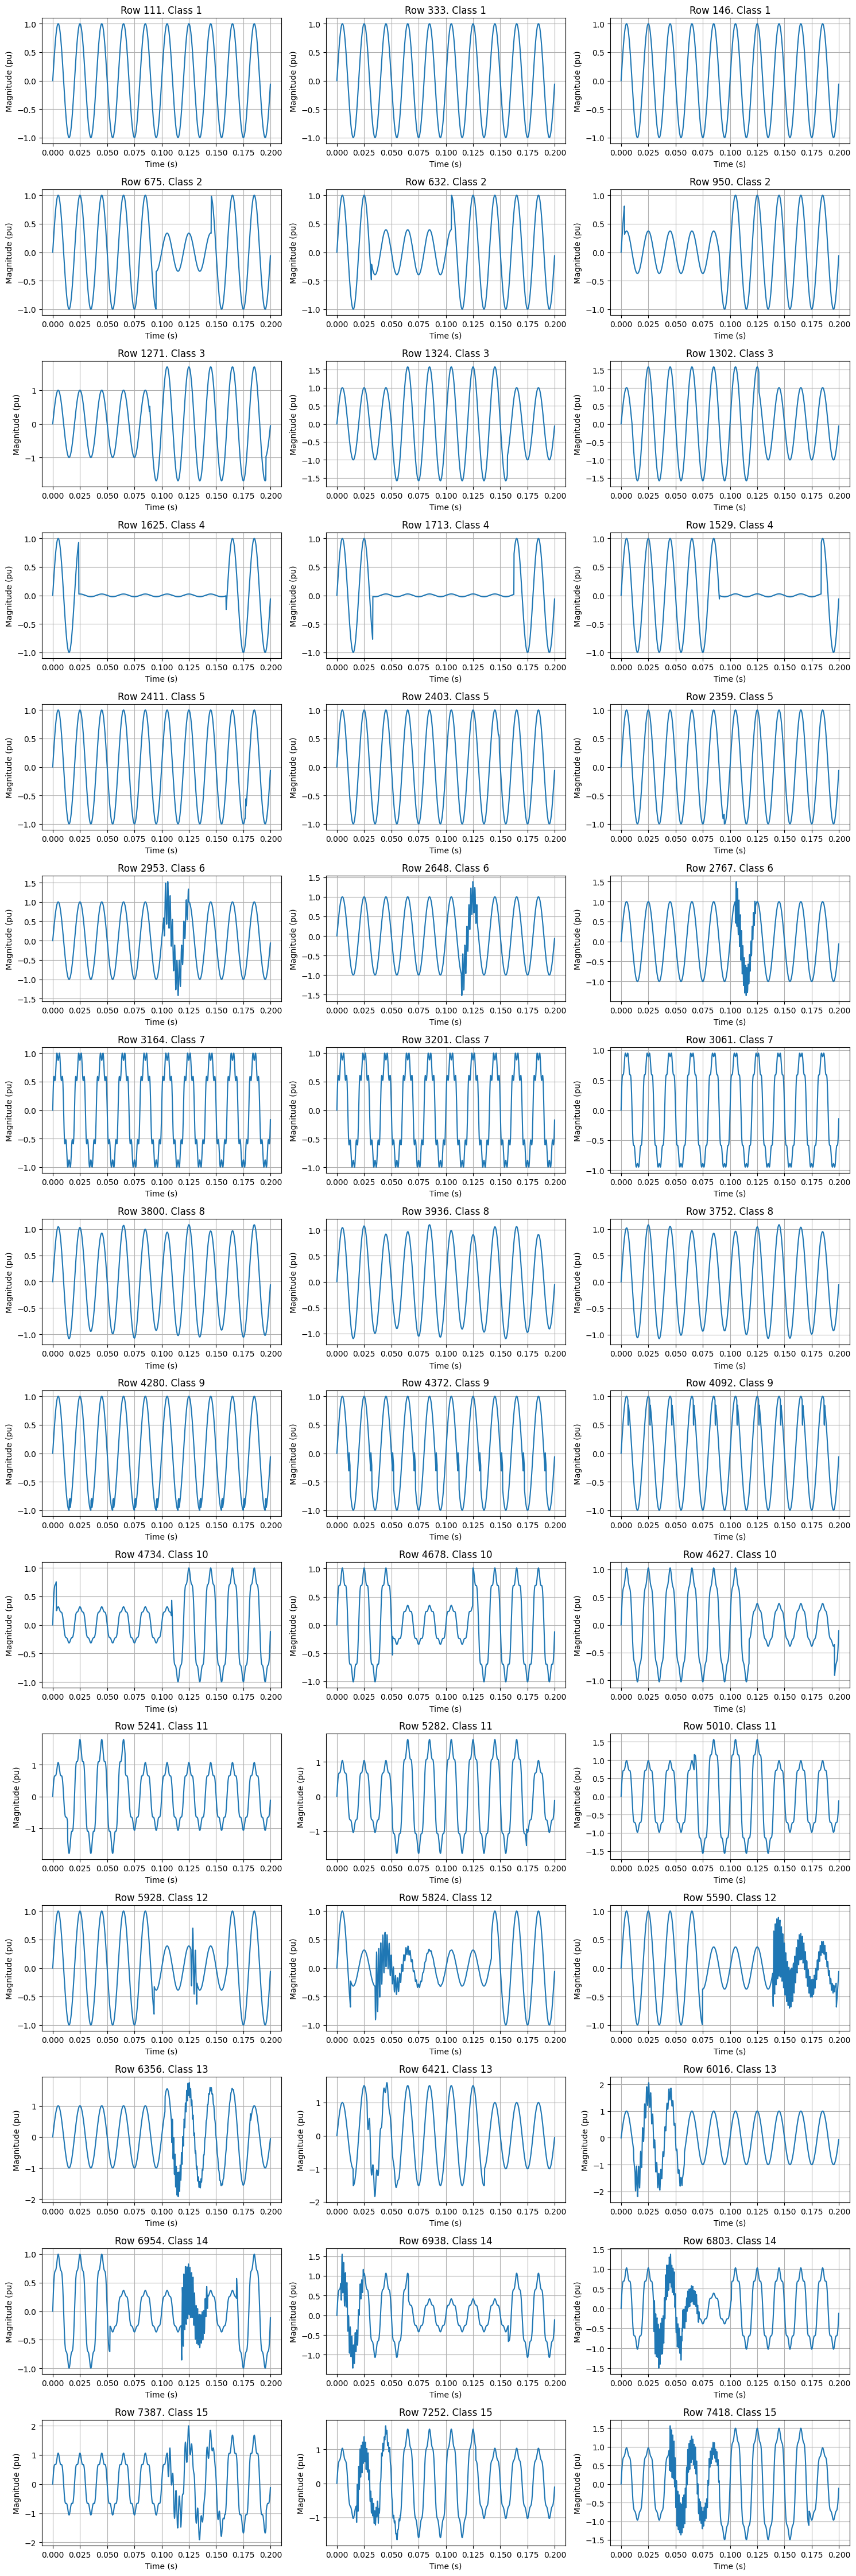

In [8]:
#plotting 3 signals of each class of PQD
labels = np.arange(1,16)
fig, ax = plt.subplots(labels.shape[0], 3, figsize = (labels.shape[0], labels.shape[0] * 3))
for label in labels:

        sample = df[df['label'] == label].sample(3)
        row_1, row_2, row_3 = sample.index[0], sample.index[1], sample.index[2]
        data_1, data_2, data_3 = sample.iloc[0], sample.iloc[1], sample.iloc[2]

        

        ax[label -1, 0].plot(times, data_1[1:])
        ax[label- 1, 0].set_title(f'Row {row_1}. Class {label}')
        ax[label-1, 0].set_xlabel('Time (s)')
        ax[label-1, 0].grid(True)
        ax[label -1, 0].set_ylabel('Magnitude (pu)')

        ax[label-1, 1].plot(times, data_2[1:])
        ax[label-1, 1].set_title(f'Row {row_2}. Class {label}')
        ax[label-1, 1].set_xlabel('Time (s)')
        ax[label-1, 1].grid(True)
        ax[label-1, 1].set_ylabel('Magnitude (pu)')

        ax[label-1, 2].plot(times, data_3[1:])
        ax[label-1, 2].set_title(f'Row {row_3}. Class {label}')
        ax[label-1, 2].set_xlabel('Time (s)')
        ax[label-1, 2].grid(True)
        ax[label-1, 2].set_ylabel('Magnitude (pu)')

plt.tight_layout()
plt.show()
       
        

"Each signal in the dataset is sampled at a frequency of 5 kHz, equivalent to 100 samples per cycle, ensuring precise capturing of waveform characteristics. The fundamental frequency across all signals is standardized at 50 Hz, reflecting typical power system frequencies. Additionally, all signals maintain a consistent amplitude of 1 per unit (pu), guaranteeing uniformity throughout the dataset."

# Feature Ideas:
- RMS through each cycle (PZC)
- Harmonics
- THD
- Max
- Phase angle of event ??



- **THD**
- **FLUTTERS? DIFFERENCING**
- **RMS**


### to-do:
- Add labels
- add timesteps as col
- Plot two of each class
- Brainstorm different features

In [9]:
df.shape

(7499, 1001)

## Feature Extraction

### RMS of the Signal

In [10]:
#create new df to store labels and features
labels_and_feats_df = pd.DataFrame(data=label_array, columns=['Label'])

#using the data for each row,  calcluate RMS value across the entire signal
labels_and_feats_df['RMS_signal'] = np.sqrt((df[df.columns[1:]] ** 2).sum(axis=1) / len(df.columns[1:]))

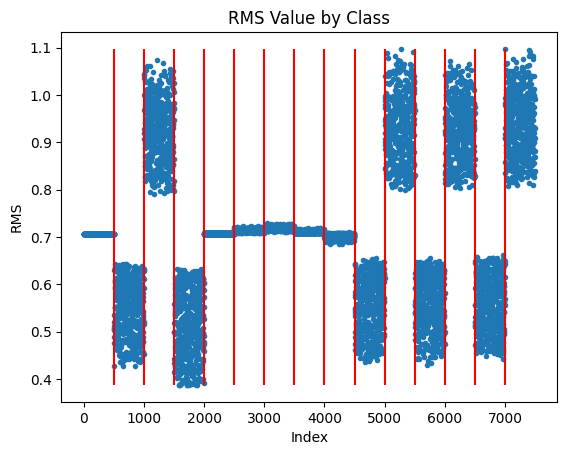

In [11]:
class_sep_lines = [500 * i for i in range(1,15)]

plt.plot(labels_and_feats_df['RMS_signal'].values,'.')

plt.vlines(x=class_sep_lines, ymin=labels_and_feats_df['RMS_signal'].min(), ymax=labels_and_feats_df['RMS_signal'].max(), colors='r')
plt.xlabel('Index')
plt.ylabel('RMS')
plt.title('RMS Value by Class')
plt.show()

### Crest Factor (CF)




![cf](image-42.png)

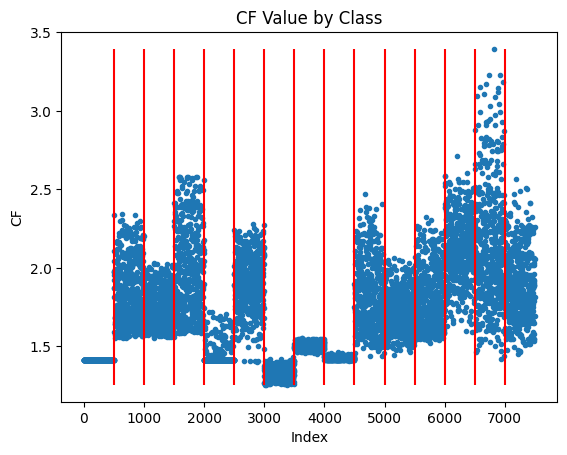

In [12]:
#find max value across signal and divide by RMS
labels_and_feats_df['CF'] = np.max(data_array,axis=1) / labels_and_feats_df['RMS_signal']

#plotting 
class_sep_lines = [500 * i for i in range(1,15)]
plt.plot(labels_and_feats_df['CF'].values, '.')
plt.vlines(x=class_sep_lines, ymin=labels_and_feats_df['CF'].min(), ymax=labels_and_feats_df['CF'].max(), colors='r')
plt.xlabel('Index')
plt.ylabel('CF')
plt.title('CF Value by Class')
plt.show()

### Harmonics 

#### Total Harmonic Distortion (THD)

![Harmonics](image-39.png)

![THD](image-40.png)

In [13]:
def total_harmonic_distortion(n_harmonics: int, signal_array: np.array, fundamental_frequency: int, sampling_rate: int, return_harmonics_array=False):
    '''
    input:
    n_harmonics: number of harmonics to calculate 
    signal_array: array of time series signal

    output:
    THD calculated up to n_harmonics
    '''
    harmonics = np.arange(1,n_harmonics+1) #harmonics [1-n_harmoics]
    # print(len(harmonics))
    harmonic_magnitude_array = np.zeros((signal_array.shape[0], len(harmonics))) #array to store the harmonic magnitudes for each signal

    N = signal_array.shape[1] #number of samples per signal

    #iterate through the harmonics
    for h in harmonics:
        #temporary store real and imaginary components of DFT
        real = np.zeros(signal_array.shape)
        imag = np.zeros(signal_array.shape)

        #
        for n in np.arange(N):
            #filling in real and imag array by taking the entire column at timestep n
            real[:,n] = signal_array[:,n] * np.cos((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            imag[:,n] = signal_array[:,n] * np.sin((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            
        #sum each signals real and imag across all timesteps and multiply by constant
        real_sum = (np.sqrt(2) / N) * np.sum(real, axis=1)
        imag_sum = (-np.sqrt(2) / N) * np.sum(imag, axis=1)
        # print(real_sum.shape)

        #fill in magnitude at h harmonic
        
        harmonic_magnitude_array[:, h-1] = np.sqrt(real_sum**2 + imag_sum**2)
    
    if return_harmonics_array:
        return harmonic_magnitude_array
    
    #total harmonic distortion
    fundamental_harmonic = harmonic_magnitude_array[:,0] #first harmonic
    
    THD = np.sqrt(np.sum((harmonic_magnitude_array[:,1:] / fundamental_harmonic[:, np.newaxis])**2,axis=1))

    return THD
    

    
    





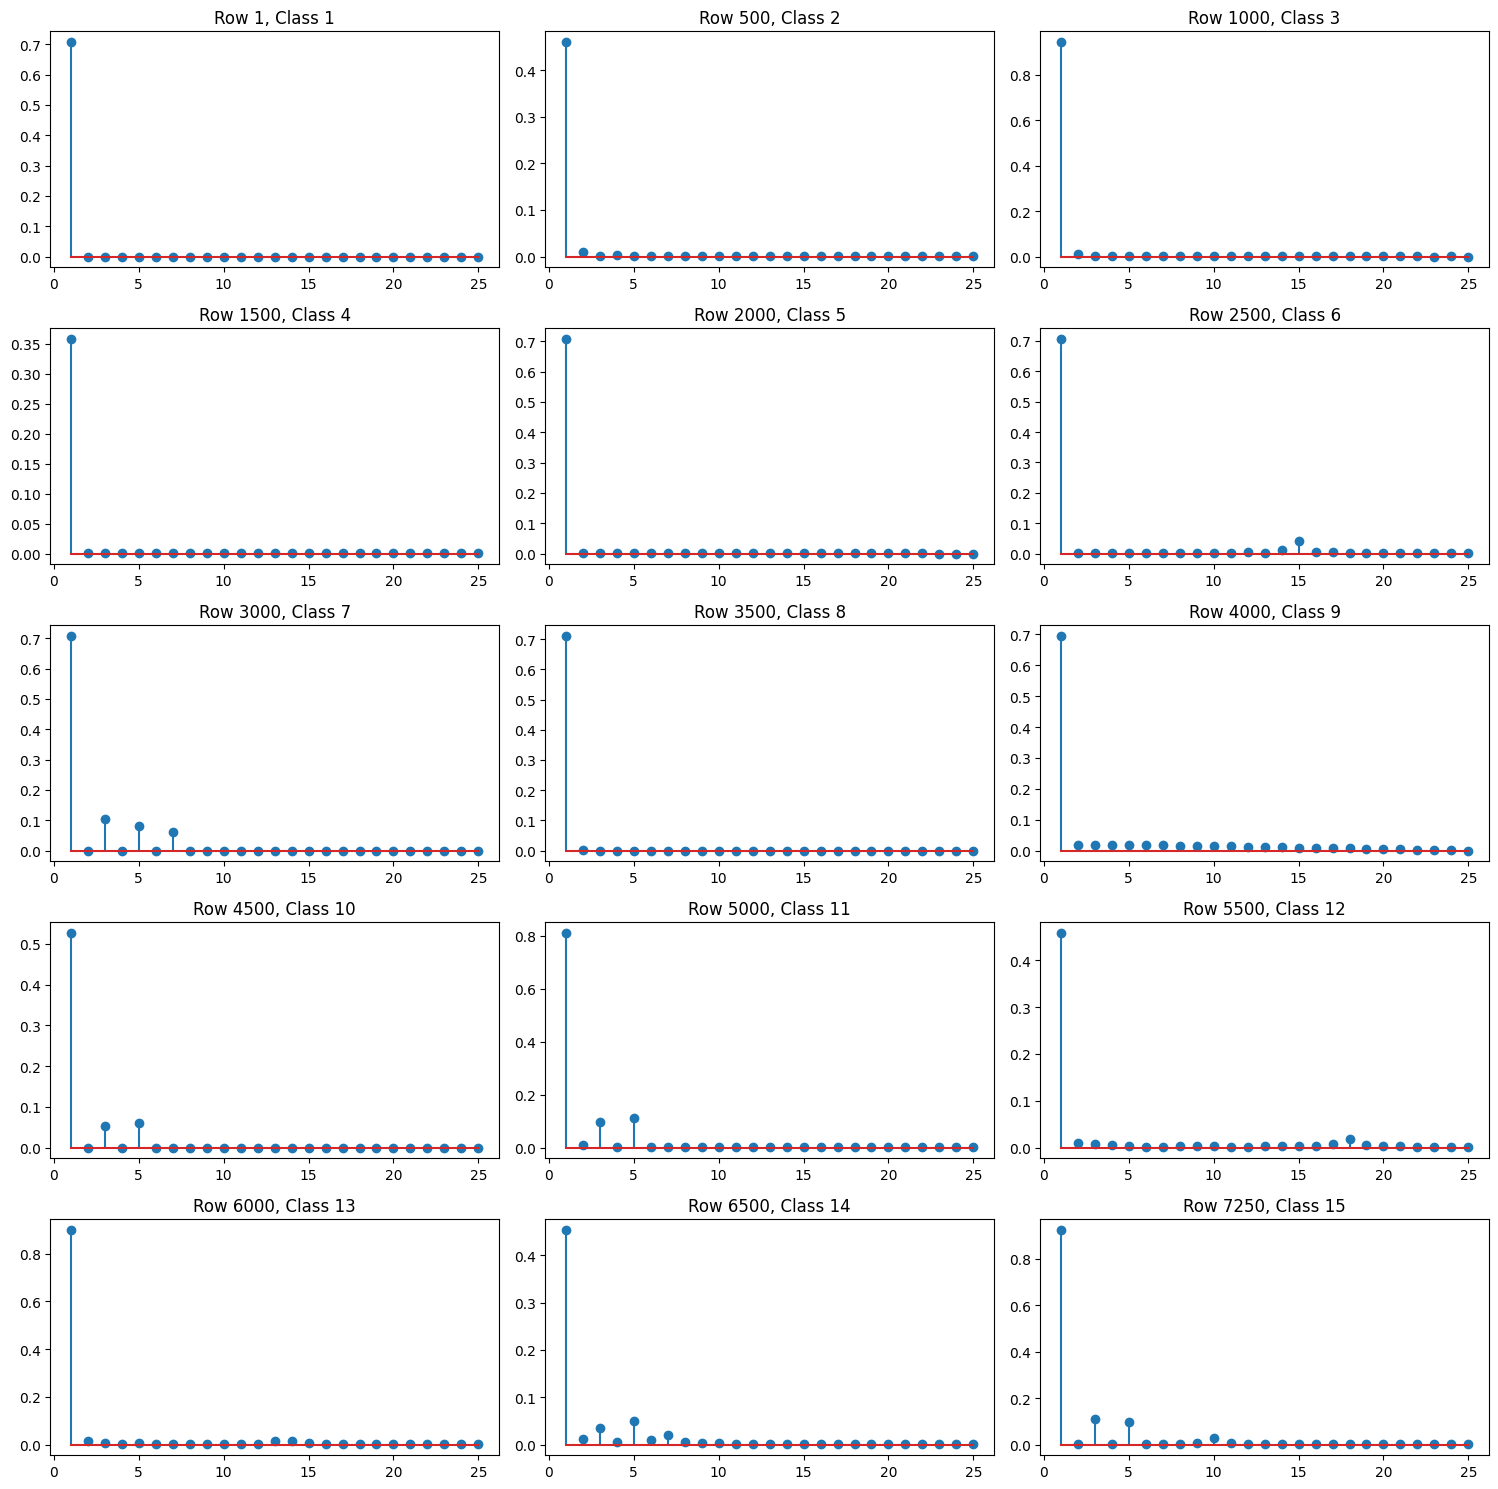

In [14]:
#sample plots at 25 harmonics 
harmonic_mags = total_harmonic_distortion(25, data_array, fundamental_frequency=50, sampling_rate=5000, return_harmonics_array=True)

#pulls one from each class - need the 1 due to class 1 only having 499 samples.
rows_to_sample = [1] + [500*i for i in range(1,14)] + [7250]

fig, axs = plt.subplots(5,3, figsize=(15,15))

#plot one from each class.
for i,sample in enumerate(rows_to_sample):

    row = i // 3
    col = i % 3

    ax = axs[row,col]

    ax.stem(np.arange(1,harmonic_mags.shape[1] + 1), harmonic_mags[sample, :])
    ax.set_title(f'Row {sample}, Class {i+1}')

plt.tight_layout()
plt.show()



In [15]:
THD = total_harmonic_distortion(50, data_array, fundamental_frequency=50, sampling_rate=5000, return_harmonics_array=False)

#add to dataframe
labels_and_feats_df['THD'] = THD

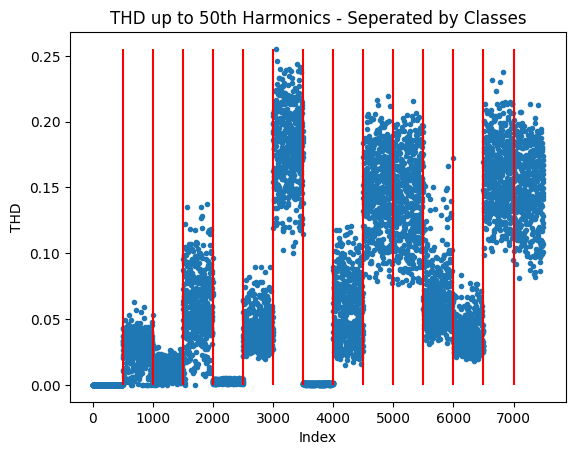

In [16]:
class_sep_lines = [500 * i for i in range(1,15)]

plt.plot(THD,'.')
plt.vlines(x=class_sep_lines, ymin=THD.min(), ymax=THD.max(), colors='r')
plt.title('THD up to 50th Harmonics - Seperated by Classes')
plt.xlabel('Index')
plt.ylabel('THD')
plt.show()

#### Phasor Harmonic Index (PHI)


![PHI](image-43.png)

In [17]:


def phasor_harmonic_index(n_harmonics: int, signal_array: np.array, fundamental_frequency: int, sampling_rate: int, return_harmonics_array=False):
    '''

    '''
    harmonics = np.arange(1,n_harmonics+1) #harmonics [1-n_harmoics]
    # print(len(harmonics))
    harmonic_magnitude_array = np.zeros((signal_array.shape[0], len(harmonics))) #array to store the harmonic magnitudes for each signal
    harmonics_phasor_angles = np.zeros(harmonic_magnitude_array.shape) #array to store harmonics phase angles (same shape as mag array)

    N = signal_array.shape[1] #number of samples per signal

    #iterate through the harmonics
    for h in harmonics:
        #temporary store real and imaginary components of DFT
        real = np.zeros(signal_array.shape)
        imag = np.zeros(signal_array.shape)

        #
        for n in np.arange(N):
            #filling in real and imag array by taking the entire column at timestep n
            real[:,n] = signal_array[:,n] * np.cos((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            imag[:,n] = signal_array[:,n] * np.sin((2 * np.pi * h * fundamental_frequency * n) / sampling_rate)
            
        #sum each signals real and imag across all timesteps and multiply by constant
        real_sum = (np.sqrt(2) / N) * np.sum(real, axis=1)
        imag_sum = (-np.sqrt(2) / N) * np.sum(imag, axis=1)
        # print(real_sum.shape)


        #fill in magnitude and phase angle at h harmonic
        harmonic_magnitude_array[:, h-1] = np.sqrt(real_sum**2 + imag_sum**2)
        harmonics_phasor_angles[:, h-1] = np.arctan(imag_sum / real_sum)
        
    if return_harmonics_array:
        return harmonics_phasor_angles
    
    #Phasor harmonic index
    fundamental_phase_angle = harmonics_phasor_angles[:,0] #first harmonic phasor
    
    PHI = np.sum(harmonic_magnitude_array * np.abs(np.cos(harmonics_phasor_angles - fundamental_phase_angle[:,np.newaxis])), axis=1) / (np.sum(harmonic_magnitude_array, axis=1))

    return PHI
    # return THD
    

    
    





In [18]:
PHI = phasor_harmonic_index(50,data_array,50,5000)

labels_and_feats_df['PHI'] = PHI


C:\Users\oconn\AppData\Local\Temp\ipykernel_45776\3501424482.py:32: RuntimeWarning: divide by zero encountered in divide
  harmonics_phasor_angles[:, h-1] = np.arctan(imag_sum / real_sum)


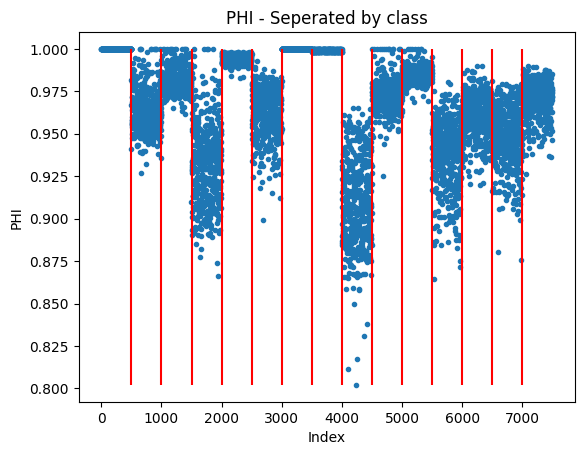

In [19]:
class_sep_lines = [500 * i for i in range(1,15)]

plt.plot(PHI,'.')
plt.vlines(x=class_sep_lines, ymin=PHI.min(), ymax=PHI.max(), colors='r')
plt.title('PHI - Seperated by class')
plt.xlabel('Index')
plt.ylabel('PHI')
plt.show()

#### Inter-Harmonics

![interharmonics](image-41.png)

In [20]:
def total_interharmonics_distortion(signal, fundamental_freq,num_cycles, sampling_rate):
    

IndentationError: expected an indented block (1204336706.py, line 2)